In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [84]:
data = pd.read_excel('UserEngagementSurvey1.xlsx')
data.head()

,Timestamp,"By clicking 'I agree' below, you are indicating that you have read and understood this consent form and agree to participate in this research study. If you are under 18 years old, you confirm that you have obtained parental or guardian consent to participate.",What is your age?,What is your gender?,What is your occupation?,How often do you use the internet?,Which device do you primarily use to access the internet?,What is your main reason for using the internet?,What types of Malaysian web platforms do you frequently visit?,How often do you interact with online shopping on websites?,How often do you interact with reading articles on websites?,How often do you interact with watching videos on websites?,How often do you interact with participating in online discussions on websites?,How often do you interact with social media integration on websites?,"How satisfied are you with the overall user experience of Malaysian web platforms? (Rate on a scale of 1-5, where 1 is 'Very Dissatisfied' and 5 is 'Very Satisfied')","How likely are you to recommend Malaysian web platforms to others? (Rate on a scale of 1-5, where 1 is 'Very Unlikely' and 5 is 'Very Likely')","How accessible do you find Malaysian web platforms for people with disabilities? (Rate on a scale of 1-5, where 1 is 'Not Accessible at All' and 5 is 'Very Accessible')","How successful are you at finding what you need on Malaysian web platforms? (Rate on a scale of 1-5, where 1 is 'Never Successful' and 5 is 'Always Successful')",What improvements would you suggest for Malaysian web platforms to enhance your experience?,Are there any additional features you would like to see implemented on Malaysian web platforms?
0,2024/12/24 11:33:49 AM GMT+8,Agree,Under 18,Female,Employed,Several times a month,Laptop,Education,Government services,4,1 (Never),1 (Never),3,2,4,4,3,2,NaN,NaN
1,2024/12/24 11:33:49 AM GMT+8,Agree,25 - 34,Female,Self-employed,Rarely,Laptop,Work,News portals,3,2,3,4,2,3,4,3,3,NaN,NaN
2,2024/12/24 11:33:49 AM GMT+8,Agree,55 - 64,Female,Retired,Once a month,Smartphone,Social Media,Government services,4,2,3,2,2,4,4,4,1,NaN,NaN
3,2024/12/24 11:33:49 AM GMT+8,Agree,55 - 64,Female,Unemployed,Rarely,Tablet,Social Media,E-commerce,3,2,2,5,3,1,4,4,5,NaN,NaN
4,2024/12/24 11:33:49 AM GMT+8,Agree,65 and above,Male,Unemployed,Several times a month,Laptop,Social Media,Educational sites,2,2,2,5,2,4,3,3,2,NaN,NaN


In [85]:
# Data Cleaning And Preparation

# Dropping columns by index positions
columns_to_drop = [0, 1]  # Index positions of 'Timestamp' and 'Terms Condition Agree'
data = data.drop(data.columns[columns_to_drop], axis=1)

data.head()

,What is your age?,What is your gender?,What is your occupation?,How often do you use the internet?,Which device do you primarily use to access the internet?,What is your main reason for using the internet?,What types of Malaysian web platforms do you frequently visit?,How often do you interact with online shopping on websites?,How often do you interact with reading articles on websites?,How often do you interact with watching videos on websites?,How often do you interact with participating in online discussions on websites?,How often do you interact with social media integration on websites?,"How satisfied are you with the overall user experience of Malaysian web platforms? (Rate on a scale of 1-5, where 1 is 'Very Dissatisfied' and 5 is 'Very Satisfied')","How likely are you to recommend Malaysian web platforms to others? (Rate on a scale of 1-5, where 1 is 'Very Unlikely' and 5 is 'Very Likely')","How accessible do you find Malaysian web platforms for people with disabilities? (Rate on a scale of 1-5, where 1 is 'Not Accessible at All' and 5 is 'Very Accessible')","How successful are you at finding what you need on Malaysian web platforms? (Rate on a scale of 1-5, where 1 is 'Never Successful' and 5 is 'Always Successful')",What improvements would you suggest for Malaysian web platforms to enhance your experience?,Are there any additional features you would like to see implemented on Malaysian web platforms?
0,Under 18,Female,Employed,Several times a month,Laptop,Education,Government services,4,1 (Never),1 (Never),3,2,4,4,3,2,NaN,NaN
1,25 - 34,Female,Self-employed,Rarely,Laptop,Work,News portals,3,2,3,4,2,3,4,3,3,NaN,NaN
2,55 - 64,Female,Retired,Once a month,Smartphone,Social Media,Government services,4,2,3,2,2,4,4,4,1,NaN,NaN
3,55 - 64,Female,Unemployed,Rarely,Tablet,Social Media,E-commerce,3,2,2,5,3,1,4,4,5,NaN,NaN
4,65 and above,Male,Unemployed,Several times a month,Laptop,Social Media,Educational sites,2,2,2,5,2,4,3,3,2,NaN,NaN


In [86]:
#changing coulmn names 
data.columns

Index(['What is your age?', 'What is your gender?', 'What is your occupation?',
       'How often do you use the internet?',
       'Which device do you primarily use to access the internet?',
       'What is your main reason for using the internet?',
       'What types of Malaysian web platforms do you frequently visit?',
       'How often do you interact with online shopping on websites?',
       'How often do you interact with reading articles on websites?',
       'How often do you interact with watching videos on websites?',
       'How often do you interact with participating in online discussions on websites?',
       'How often do you interact with social media integration on websites?',
       'How satisfied are you with the overall user experience of Malaysian web platforms? (Rate on a scale of 1-5, where 1 is 'Very Dissatisfied' and 5 is 'Very Satisfied') ',
       'How likely are you to recommend Malaysian web platforms to others? (Rate on a scale of 1-5, where 1 is 'Very U

In [87]:
data.rename(columns={
    'What is your age?': 'age',
    'What is your gender?': 'gender',
    'What is your occupation?': 'occupation',
    'How often do you use the internet?':'internet_usage',
    'Which device do you primarily use to access the internet?':'device',
    'What is your main reason for using the internet?':'reason',
    'What types of Malaysian web platforms do you frequently visit?':'webplatform_types',
    'How often do you interact with online shopping on websites?':'for_online_shopping',
    'How often do you interact with reading articles on websites?':'for_reading_articles',
    'How often do you interact with watching videos on websites?':'for_watching_videos',
    'How often do you interact with participating in online discussions on websites?':'for_online_discussions',
    'How often do you interact with social media integration on websites?':'social_media_integration',
    "How satisfied are you with the overall user experience of Malaysian web platforms? (Rate on a scale of 1-5, where 1 is 'Very Dissatisfied' and 5 is 'Very Satisfied') ":'overall_experience',
    'How likely are you to recommend Malaysian web platforms to others? (Rate on a scale of 1-5, where 1 is \'Very Unlikely\' and 5 is \'Very Likely\')':'will_recommend',
    'How accessible do you find Malaysian web platforms for people with disabilities? (Rate on a scale of 1-5, where 1 is \'Not Accessible at All\' and 5 is \'Very Accessible\')':'accessiblity_for_disable',
    'How successful are you at finding what you need on Malaysian web platforms? (Rate on a scale of 1-5, where 1 is \'Never Successful\' and 5 is \'Always Successful\')':'rating_for_finding_needs',
    "What improvements would you suggest for Malaysian web platforms to enhance your experience? ":'improvements',
    'Are there any additional features you would like to see implemented on Malaysian web platforms?':'additional_features'
}, inplace=True)

data.head()

,age,gender,occupation,internet_usage,device,reason,webplatform_types,for_online_shopping,for_reading_articles,for_watching_videos,for_online_discussions,social_media_integration,overall_experience,will_recommend,accessiblity_for_disable,rating_for_finding_needs,improvements,additional_features
0,Under 18,Female,Employed,Several times a month,Laptop,Education,Government services,4,1 (Never),1 (Never),3,2,4,4,3,2,NaN,NaN
1,25 - 34,Female,Self-employed,Rarely,Laptop,Work,News portals,3,2,3,4,2,3,4,3,3,NaN,NaN
2,55 - 64,Female,Retired,Once a month,Smartphone,Social Media,Government services,4,2,3,2,2,4,4,4,1,NaN,NaN
3,55 - 64,Female,Unemployed,Rarely,Tablet,Social Media,E-commerce,3,2,2,5,3,1,4,4,5,NaN,NaN
4,65 and above,Male,Unemployed,Several times a month,Laptop,Social Media,Educational sites,2,2,2,5,2,4,3,3,2,NaN,NaN


In [88]:
data.age.value_counts()

age
25 - 34         31
45 - 54         27
55 - 64         26
18 - 24         20
Under 18        18
35 - 44         18
65 and above    11
Name: count, dtype: int64

In [89]:
data['age'] = data['age'].map({'Under 18': '0-18', '18 - 24': '18-24','25 - 34':'25-34','35 - 44':'35-44',
                               '45 - 54':'45-54',
                               '55 - 64':'55-64',
                              '65 and above':'65-100'})

In [90]:
data.age.value_counts().sort_index()

age
0-18      18
18-24     20
25-34     31
35-44     18
45-54     27
55-64     26
65-100    11
Name: count, dtype: int64

In [91]:
data['for_online_shopping'].value_counts()

for_online_shopping
4             42
2             38
3             36
1 (Never)     18
5 (Always)    17
Name: count, dtype: int64

In [92]:
data['for_online_shopping'].map(type)

0      <class 'int'>
1      <class 'int'>
2      <class 'int'>
3      <class 'int'>
4      <class 'int'>
           ...      
146    <class 'int'>
147    <class 'str'>
148    <class 'int'>
149    <class 'str'>
150    <class 'int'>
Name: for_online_shopping, Length: 151, dtype: object

In [93]:
data['for_online_shopping'] = data['for_online_shopping'].map({'1 (Never)': 1, 2:2, 3:3, 4:4 , '5 (Always)':5})
data['for_reading_articles'] = data['for_reading_articles'].map({'1 (Never)': 1, 2:2, 3:3, 4:4 , '5 (Always)':5})
data['for_watching_videos'] = data['for_watching_videos'].map({'1 (Never)': 1, 2:2, 3:3, 4:4 , 5:5})
data['social_media_integration'] = data['social_media_integration'].map({'1 (Never)': 1, 2:2, 3:3, 4:4 , 5:5})

In [94]:
data.head()

,age,gender,occupation,internet_usage,device,reason,webplatform_types,for_online_shopping,for_reading_articles,for_watching_videos,for_online_discussions,social_media_integration,overall_experience,will_recommend,accessiblity_for_disable,rating_for_finding_needs,improvements,additional_features
0,0-18,Female,Employed,Several times a month,Laptop,Education,Government services,4,1,1,3,2,4,4,3,2,NaN,NaN
1,25-34,Female,Self-employed,Rarely,Laptop,Work,News portals,3,2,3,4,2,3,4,3,3,NaN,NaN
2,55-64,Female,Retired,Once a month,Smartphone,Social Media,Government services,4,2,3,2,2,4,4,4,1,NaN,NaN
3,55-64,Female,Unemployed,Rarely,Tablet,Social Media,E-commerce,3,2,2,5,3,1,4,4,5,NaN,NaN
4,65-100,Male,Unemployed,Several times a month,Laptop,Social Media,Educational sites,2,2,2,5,2,4,3,3,2,NaN,NaN


In [95]:
# Dealing With Missing Data
# Sorting Percentage Of Null Values In Each Column
(data.isnull().sum()/len(data)*100).sort_values(ascending = False)

additional_features         25.827815
improvements                25.827815
gender                       0.000000
rating_for_finding_needs     0.000000
accessiblity_for_disable     0.000000
will_recommend               0.000000
overall_experience           0.000000
social_media_integration     0.000000
for_online_discussions       0.000000
age                          0.000000
for_reading_articles         0.000000
for_online_shopping          0.000000
webplatform_types            0.000000
reason                       0.000000
device                       0.000000
internet_usage               0.000000
occupation                   0.000000
for_watching_videos          0.000000
dtype: float64

In [96]:
# As you can see we are getting lots of null values in additional_features and in improvements 
# let's get rid of it
data['additional_features'].fillna(value='Not Specified',inplace=True)
data['improvements'].fillna(value='Not Specified',inplace=True)

In [97]:
data.isnull().sum()

age                         0
gender                      0
occupation                  0
internet_usage              0
device                      0
reason                      0
webplatform_types           0
for_online_shopping         0
for_reading_articles        0
for_watching_videos         0
for_online_discussions      0
social_media_integration    0
overall_experience          0
will_recommend              0
accessiblity_for_disable    0
rating_for_finding_needs    0
improvements                0
additional_features         0
dtype: int64

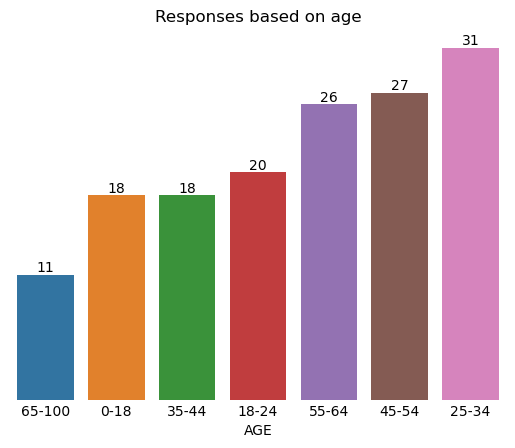

In [98]:
# Data analysis using Data Visualization

# Responses based on age
age = data['age'].value_counts(ascending=True)
ax = sns.barplot(x=age.index, y=age.values, order=age.index) 
ax.set(xlabel='AGE', yticks=[], title='Responses based on age', frame_on=False) 
ax.tick_params(length=0)                              
ax.bar_label(ax.containers[0])
plt.show()

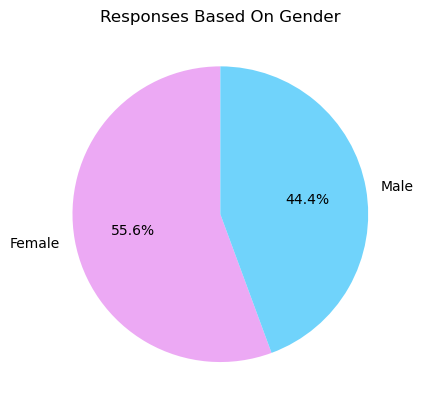

In [99]:
# Responses based on gender
colors = ['#eca9f4', '#70d3fb'] 
data.groupby('gender').size().plot(kind='pie', colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Responses Based On Gender')
plt.show()

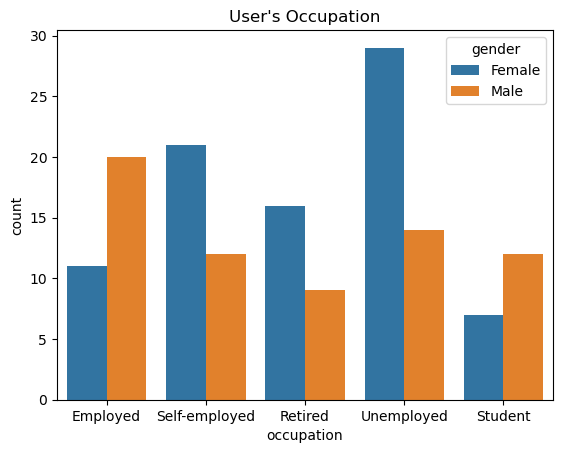

In [100]:
# User's Occupation
sns.countplot(x='occupation',hue='gender',data=data)
plt.title("User's Occupation")
plt.show()

In [101]:
# How often user's use the internet
data['internet_usage'].value_counts()

internet_usage
Several times a month    37
Once a month             35
Once a week              29
Several times a week     19
Rarely                   17
Daily                    14
Name: count, dtype: int64

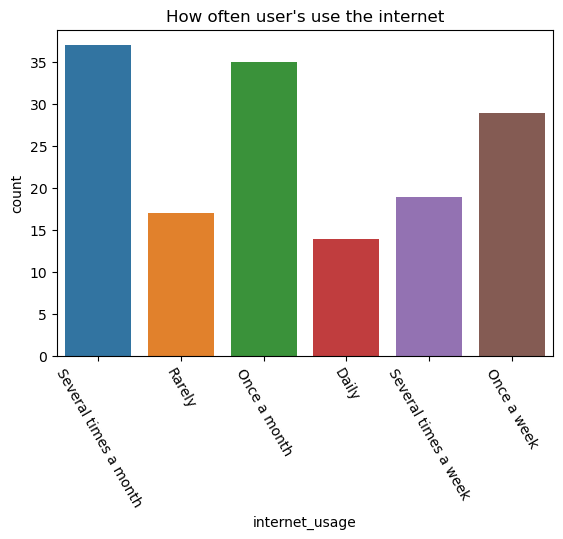

In [117]:
sns.countplot(x='internet_usage', data=data, width=0.8)
plt.title("How often user's use the internet")
plt.xticks(rotation=-60)
plt.subplots_adjust(bottom=0.2)
plt.show()

In [103]:
data['device'].value_counts()

device
Laptop        61
Tablet        43
Desktop       27
Smartphone    20
Name: count, dtype: int64

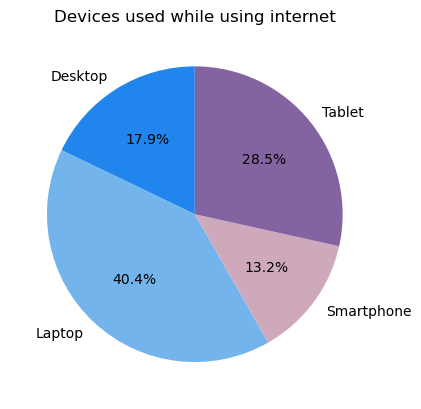

In [140]:
# Devices used while using internet
colors = ['#2085ec', '#72b4eb','#cea9bc','#8464a0']
data.groupby('device').size().plot(kind='pie', colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Devices used while using internet')
plt.show()

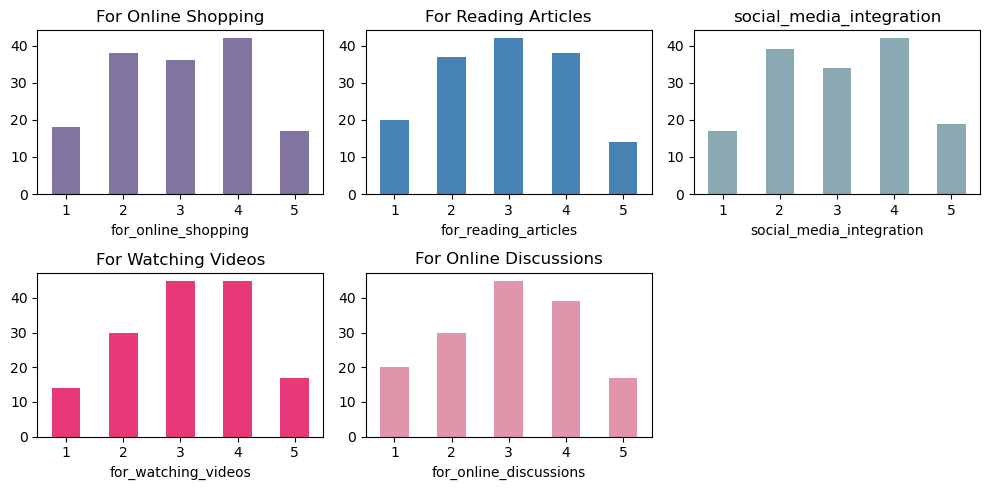

In [134]:
fig, axarr = plt.subplots(2, 3, figsize=(10, 5))
colors = ['#8174A0', '#4682B4', '#E73879', '#E195AB', '#89A8B2']

# Plot graphs
data['for_online_shopping'].value_counts().sort_index().plot.bar(ax=axarr[0][0],color=colors[0])
axarr[0][0].set_title("For Online Shopping")

data['for_reading_articles'].value_counts().sort_index().plot.bar(ax=axarr[0][1],color=colors[1])
axarr[0][1].set_title("For Reading Articles")

data['for_watching_videos'].value_counts().sort_index().plot.bar(ax=axarr[1][0],color=colors[2])
axarr[1][0].set_title("For Watching Videos")

data['for_online_discussions'].value_counts().sort_index().plot.bar(ax=axarr[1][1],color=colors[3])
axarr[1][1].set_title("For Online Discussions")

data['social_media_integration'].value_counts().sort_index().plot.bar(ax=axarr[0][2],color=colors[4])
axarr[0][2].set_title("social_media_integration")


fig.delaxes(axarr[1][2])  # Remove the last (unused) subplot

for ax in axarr.flat:
    ax.tick_params(axis='x', rotation=0)# the x axis labels were rotated by default

plt.tight_layout()
plt.show()


In [106]:
data.columns

Index(['age', 'gender', 'occupation', 'internet_usage', 'device', 'reason',
       'webplatform_types', 'for_online_shopping', 'for_reading_articles',
       'for_watching_videos', 'for_online_discussions',
       'social_media_integration', 'overall_experience', 'will_recommend',
       'accessiblity_for_disable', 'rating_for_finding_needs', 'improvements',
       'additional_features'],
      dtype='object')

In [107]:
data['reason'].value_counts()

reason
Entertainment           39
Social Media            33
Education               27
News and Information    20
Work                    17
Shopping                15
Name: count, dtype: int64

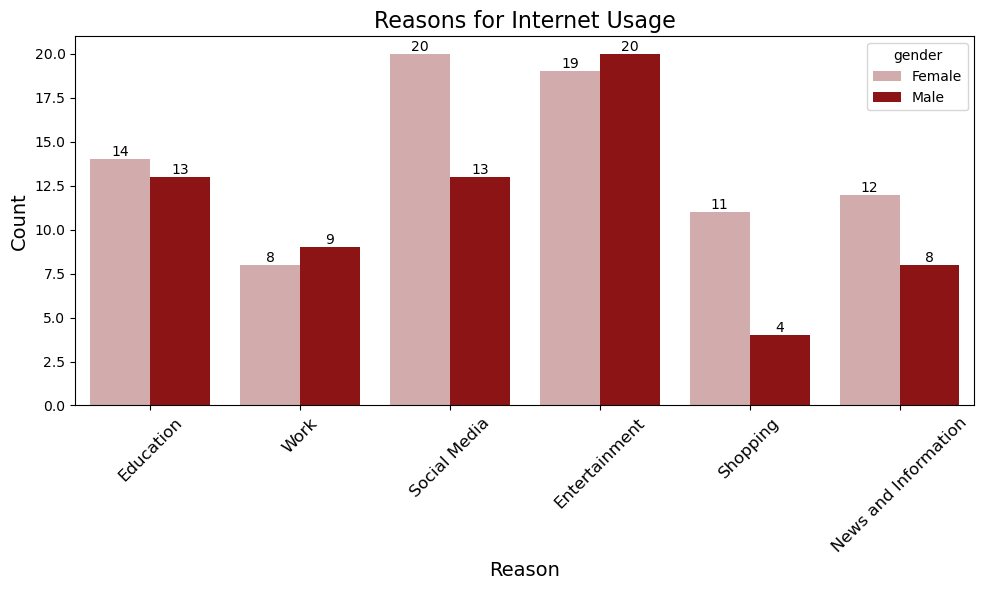

In [110]:
# reasons
custom_colors = ['#d8a6a6', '#a00000', '#a6a6d8']
plt.figure(figsize=(10, 6)) 
ax = sns.countplot(x='reason', hue='gender', data=data, palette=custom_colors)

# Add labels on bars
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title("Reasons for Internet Usage", fontsize=16)
plt.xlabel("Reason", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for readability
plt.tight_layout()



plt.show()


In [111]:
data['webplatform_types'].value_counts()

webplatform_types
Blogs                  30
News portals           27
Social media           25
Educational sites      24
Government services    21
E-commerce             12
Forums                 12
Name: count, dtype: int64

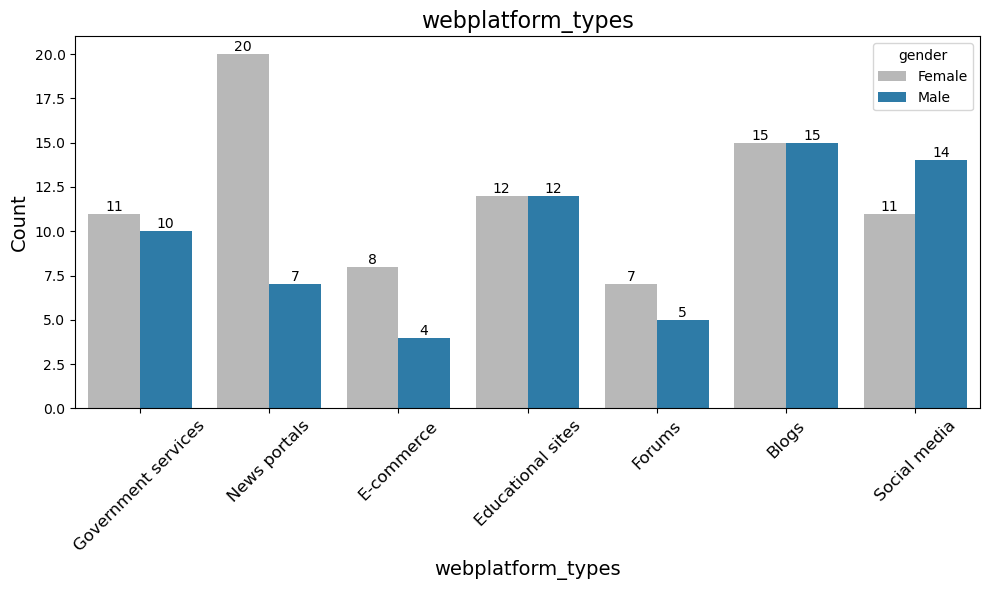

In [112]:
# webplatform_types
custom_colors = ['#b8b8b8', '#1a80bb', '#a6a6d8']
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='webplatform_types', hue='gender', data=data, palette=custom_colors)

# Add labels on bars
# for p in plot.patches:
#     plot.annotate(format(p.get_height(), '.0f'),  # Display integer count
#                   (p.get_x() + p.get_width() / 2., p.get_height() + 0.2),  # Position above bar
#                   ha='center', fontsize=10)
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title("webplatform_types", fontsize=16)
plt.xlabel("webplatform_types", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)  
plt.tight_layout()



plt.show()

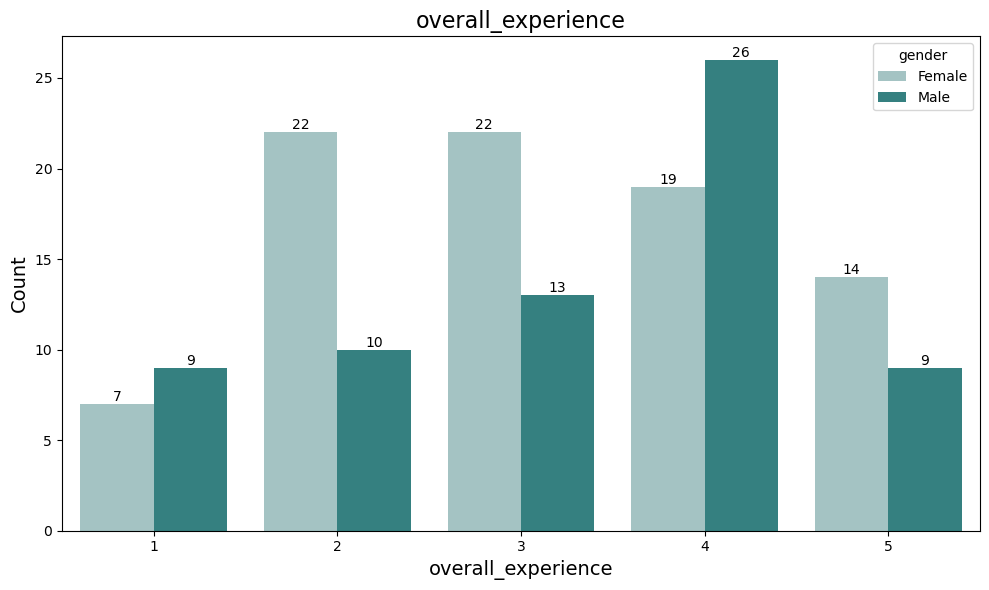

In [124]:
# overall_experience
custom_colors = ['#9fc8c8','#298c8c', '#a6a6d8']
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='overall_experience', hue='gender', data=data, palette=custom_colors)

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title("overall_experience", fontsize=16)
plt.xlabel("overall_experience", fontsize=14)
plt.ylabel("Count", fontsize=14)  
plt.tight_layout()

plt.show()

In [125]:
data.columns

Index(['age', 'gender', 'occupation', 'internet_usage', 'device', 'reason',
       'webplatform_types', 'for_online_shopping', 'for_reading_articles',
       'for_watching_videos', 'for_online_discussions',
       'social_media_integration', 'overall_experience', 'will_recommend',
       'accessiblity_for_disable', 'rating_for_finding_needs', 'improvements',
       'additional_features'],
      dtype='object')

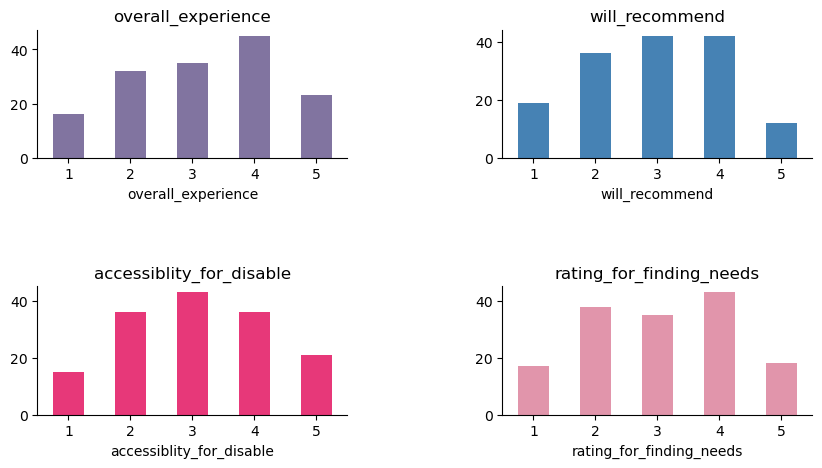

In [133]:
fig, axarr = plt.subplots(2, 2, figsize=(10, 5))
colors = ['#8174A0', '#4682B4', '#E73879', '#E195AB']

data['overall_experience'].value_counts().sort_index().plot.bar(ax=axarr[0][0],color=colors[0])
axarr[0][0].set_title("overall_experience")

data['will_recommend'].value_counts().sort_index().plot.bar(ax=axarr[0][1],color=colors[1])
axarr[0][1].set_title("will_recommend")

data['accessiblity_for_disable'].value_counts().sort_index().plot.bar(ax=axarr[1][0],color=colors[2])
axarr[1][0].set_title("accessiblity_for_disable")

data['rating_for_finding_needs'].value_counts().sort_index().plot.bar(ax=axarr[1][1],color=colors[3])
axarr[1][1].set_title("rating_for_finding_needs")

for ax in axarr.flat:
    ax.tick_params(axis='x', rotation=0) # labels were rotated by default

plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

In [135]:
data.isnull().sum()

age                         0
gender                      0
occupation                  0
internet_usage              0
device                      0
reason                      0
webplatform_types           0
for_online_shopping         0
for_reading_articles        0
for_watching_videos         0
for_online_discussions      0
social_media_integration    0
overall_experience          0
will_recommend              0
accessiblity_for_disable    0
rating_for_finding_needs    0
improvements                0
additional_features         0
dtype: int64

In [141]:
data['improvements'].value_counts()

improvements
Not Specified                  39
Mobile Optimization            23
Faster Loading Times           23
Better Search Functionality    19
Enhanced Data Protection       13
Local Customization            13
Modern and Clean Design        13
Secure Transactions             8
Name: count, dtype: int64

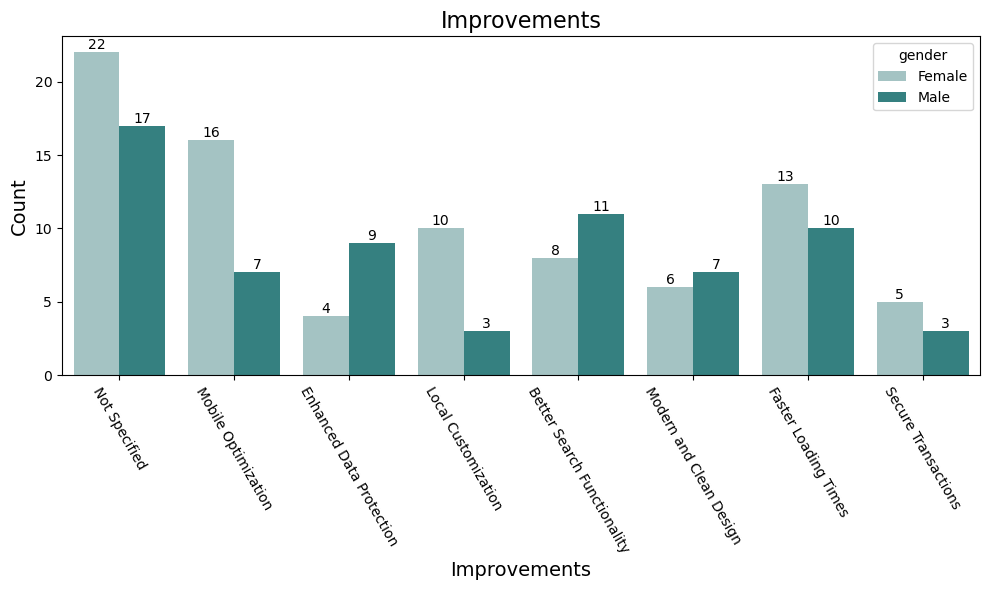

In [158]:
# improvements
custom_colors = ['#9fc8c8','#298c8c', '#a6a6d8']
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='improvements', hue='gender', data=data, palette=custom_colors)

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title("Improvements", fontsize=16)
plt.xlabel("Improvements", fontsize=14)
plt.ylabel("Count", fontsize=14) 
plt.xticks(rotation=-60, fontsize=10)
plt.tight_layout()

plt.show()

In [167]:
import plotly.express as px


improvements_count = data.groupby(['improvements', 'gender']).size().reset_index(name='count')

fig = px.bar(improvements_count, 
             x='improvements', 
             y='count', 
             color='gender', 
             title="Improvements by Gender", 
             labels={'improvements': 'Improvements', 'count': 'Count'},
             color_discrete_sequence=['#9fc8c8','#298c8c', '#a6a6d8'])

fig.update_layout(barmode='group',
                  xaxis_tickangle=60, 
                  title_text="Improvements", 
                  xaxis_title="Improvements", 
                  yaxis_title="Count", 
                  font=dict(size=14),
                  width=1000,  # Increase width for more space
                  height=700,  # Adjust height if needed
                  xaxis={'automargin': True})


fig.show()


In [170]:
import plotly.express as px


addfea_count = data.groupby(['additional_features', 'gender']).size().reset_index(name='count')

fig = px.bar(addfea_count, 
             x='additional_features', 
             y='count', 
             color='gender', 
             title="additional_features by Gender", 
             labels={'additional_features': 'additional_features', 'count': 'Count'},
             color_discrete_sequence=['#b8b8b8', '#1a80bb', '#a6a6d8'])

fig.update_layout(barmode='group',
                  xaxis_tickangle=60, 
                  title_text="additional_features", 
                  xaxis_title="additional_features", 
                  yaxis_title="Count", 
                  font=dict(size=14),
                  width=1000,  
                  height=700,  
                  xaxis={'automargin': True})


fig.show()